In [1]:
import timeit
import os
import sys
sys.path.insert(0, '/media/rb/Omega/0. Thesis Linux/TDD Code/caffe-action_recog/python') #To Look For .py Files in this directory
import caffe
import scipy.io
import scipy as sp
import numpy as np
from pylab import *
from sklearn.metrics import mean_squared_error #For RMSE Calculation
from math import sqrt                          #For RMSE Calculation
import pickle                                  #For saving predicted data externally
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
print 'Done'

Done


0.28101444977
Complete
1297.03695202


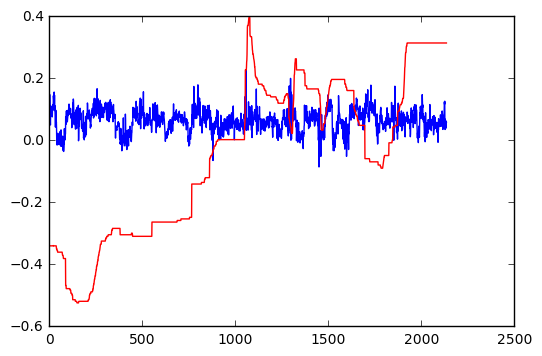

In [2]:
testnum = '31';

tic = timeit.default_timer();
model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'
toc = timeit.default_timer();
time_elapsed = toc - tic; #elapsed time in seconds
print time_elapsed

0.318165386518
Complete


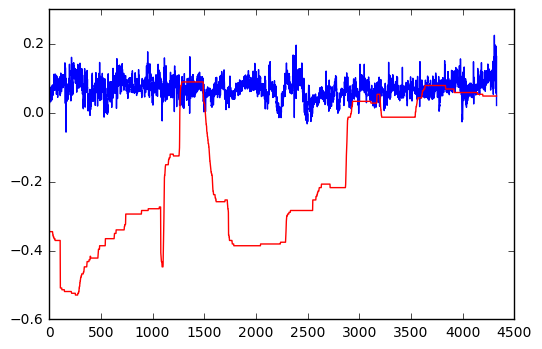

In [3]:
testnum = '30';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.303914213689
Complete


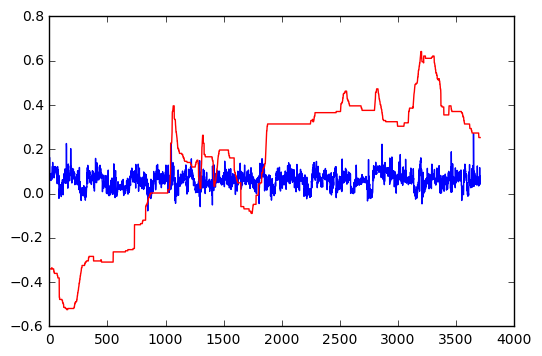

In [4]:
testnum = '31';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.285228589432
Complete


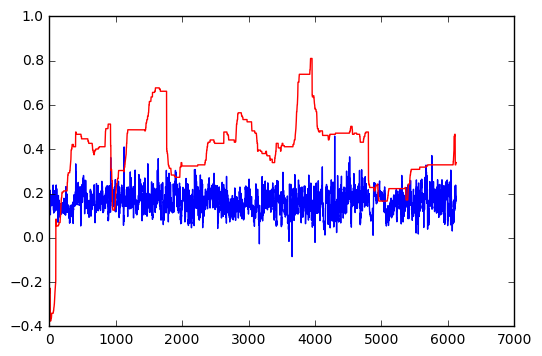

In [5]:
testnum = '52';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.348773393684
Complete


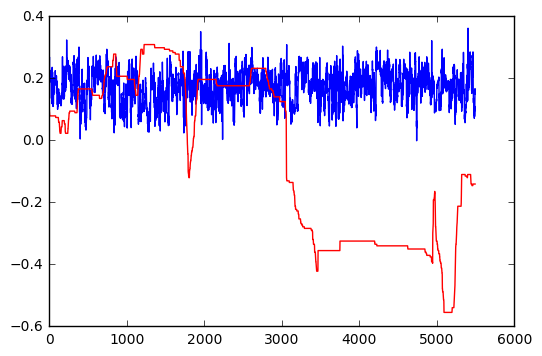

In [6]:
testnum = '54';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.637987826266
Complete


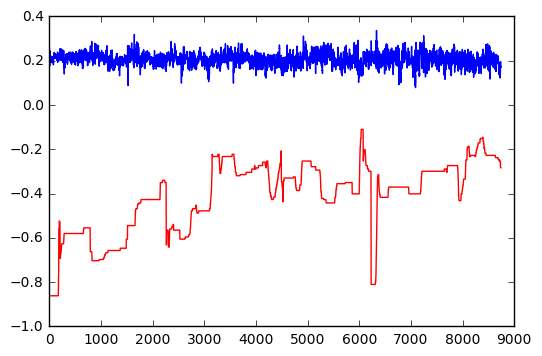

In [7]:
testnum = '59';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.488041994606
Complete


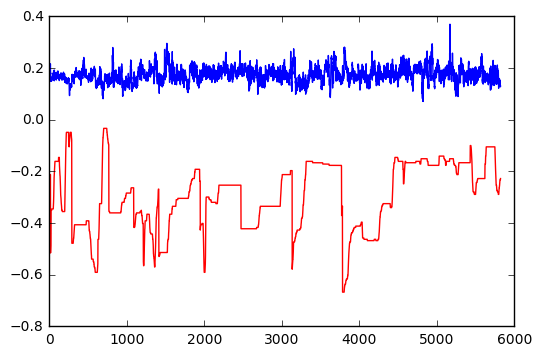

In [8]:
testnum = '61';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.503449106965
Complete


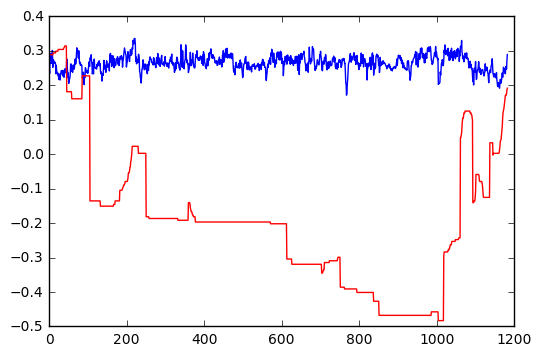

In [9]:
testnum = '65';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.573736702094
Complete


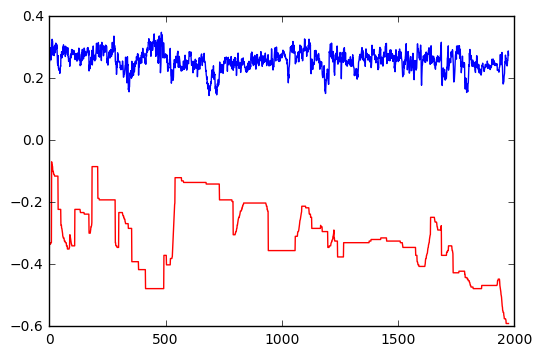

In [10]:
testnum = '67';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.42001540451
Complete


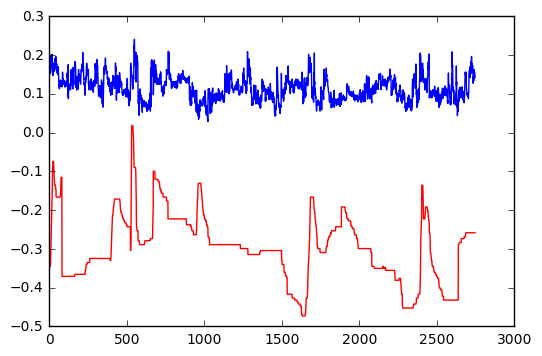

In [11]:
testnum = '72';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.209013651642
Complete


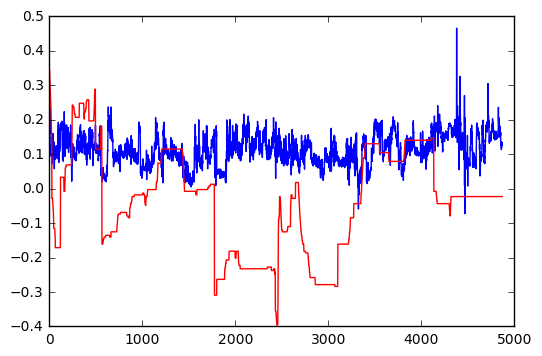

In [12]:
testnum = '73';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.361796781391
Complete


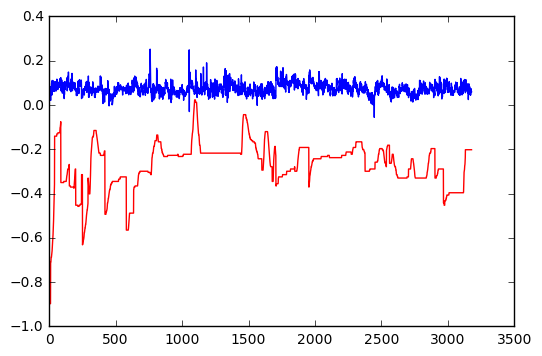

In [13]:
testnum = '76';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.446301215943
Complete


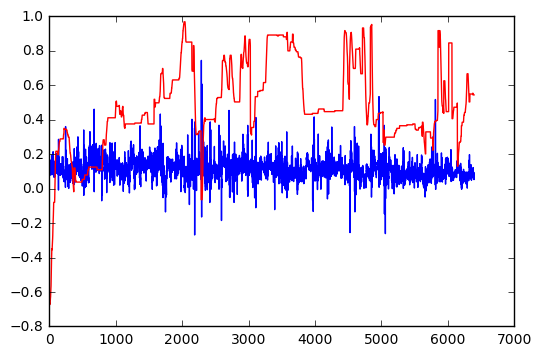

In [2]:
testnum = '78';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.438641625412
Complete


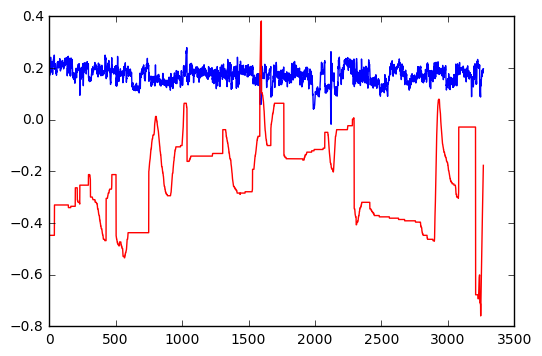

In [3]:
testnum = '83';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.429753003763
Complete


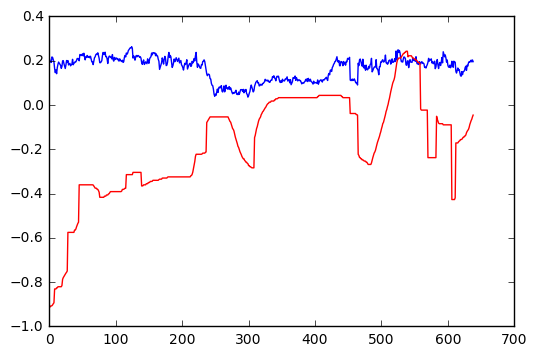

In [4]:
testnum = '84';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.204178316569
Complete


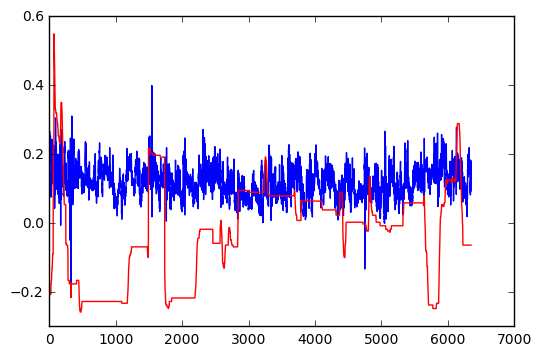

In [5]:
testnum = '95';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.215169771957
Complete


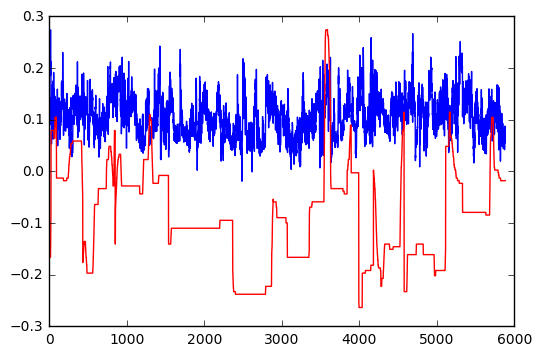

In [6]:
testnum = '96';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.293542440112
Complete


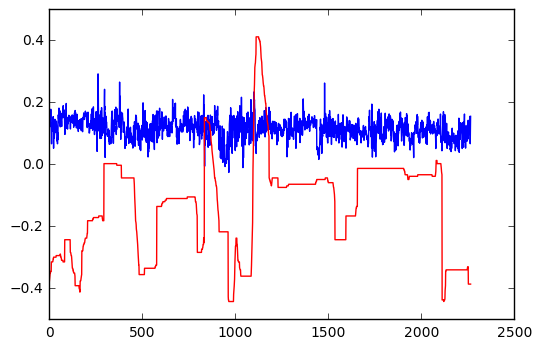

In [ ]:
testnum = '101';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.570711753827
Complete


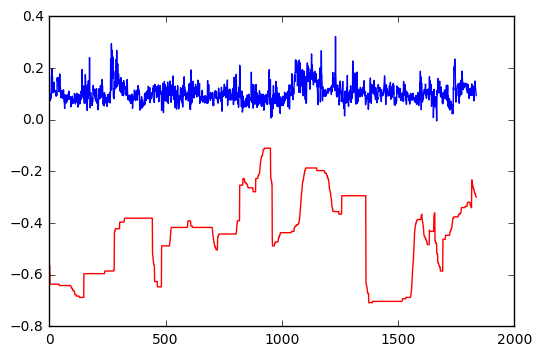

In [2]:
testnum = '103';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.731717434674
Complete


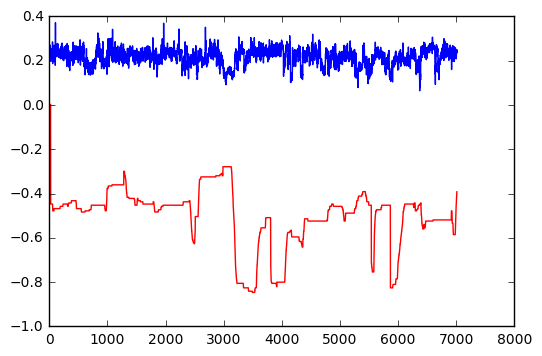

In [3]:
testnum = '107';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.211870109817
Complete


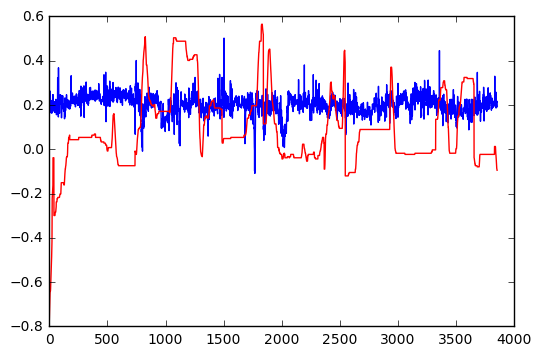

In [4]:
testnum = '108';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.44782769813
Complete


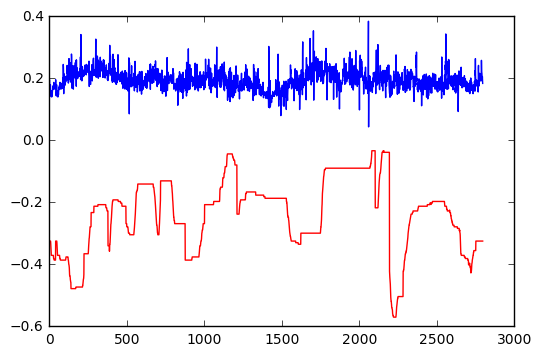

In [5]:
testnum = '109';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'

0.279239715383
Complete


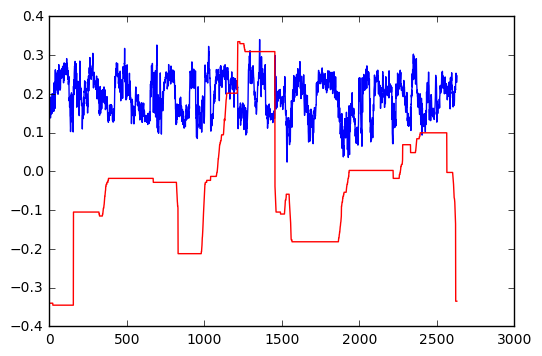

In [6]:
testnum = '128';

model = 'deploy_audiovideo_Arousal.prototxt';
thousand = '15';
weights = 'outputModel_audiovideo_iter_' + thousand + '000_Arousal.caffemodel';   

net = caffe.Net(model,weights,caffe.TEST);

with open( 'List_' + testnum + '_Audio_Arousal.txt', 'r' ) as TA :
    path_list_a = TA.readlines()
with open( 'List_' + testnum + '_Video_Arousal.txt', 'r' ) as TV :
    path_list_v = TV.readlines()
    
if not os.path.exists('AudioVideoFeaturesArousal'):
    os.makedirs('AudioVideoFeaturesArousal')

feature_list_file = open( 'AudioVideoFeaturesArousal/FeatureList_' + testnum + '_AudioVideo_Arousal.txt', 'w') 

predicted_value_arr = np.zeros((len(path_list_a), 1),dtype="f4")
actual_value_arr = np.zeros((len(path_list_v), 1),dtype="f4")

for i in range(len(path_list_a)):
    sp_v = path_list_v[i].split(' ')
    img = caffe.io.load_image(sp_v[0], color=False )
    img = caffe.io.resize( img, (128, 128, 1) )
    img = np.transpose(img, (2,0,1))
    net.blobs['data_v'].data[...] = img
    
    sp_a = path_list_a[i].split(' ')    
    f = scipy.io.loadmat(sp_a[0]) #sp_a[0] is matfilename
    X_samples = f.get('samples')
    X_samples = np.transpose(X_samples,(1,0))
    X_samples = X_samples[np.newaxis, :, :] #(n_samples, n_channels, height, width)
    net.blobs['data_a'].data[...] = X_samples
    
    out = net.forward()
    
    feature_array = net.blobs['concat_av'].data
    predicted_value = net.blobs['fc2_av'].data
    actual_value = float(sp_a[1])
    
    predicted_value_arr[i] = predicted_value
    actual_value_arr[i] = actual_value
    
    folddir = sp_a[0].split('/') 
    directory = 'AudioVideoFeaturesArousal/' + folddir[1];
    filename = directory + '/AudioVideo' + filter(str.isdigit, folddir[2]) + 'FeatureArousal.mat';
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    scipy.io.savemat(filename, mdict={'feature_array':feature_array,'predicted_value':predicted_value,'actual_value':actual_value})
    feature_list_file.write(filename + '\n')
feature_list_file.close()

plt.plot(arange(len(predicted_value_arr)), predicted_value_arr, 'b',arange(len(actual_value_arr)), actual_value_arr, 'r')

rmse = sqrt(mean_squared_error(actual_value_arr, predicted_value_arr))
print rmse

scipy.io.savemat('actual_value_audiovideo' + testnum + '_Arousal.mat', mdict={'a_value': actual_value_arr})
scipy.io.savemat('predicted_value_audiovideo' + testnum + '_' + thousand + 'k_Arousal.mat', mdict={'p_value': predicted_value_arr})

print 'Complete'